## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able [link](https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv):

```bash
wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
```

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `'JAMB_Score'`).

In [109]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-11-03 19:08:08--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-03 19:08:08--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv.1’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.1s    

2024-11-03 19:08:09 (2.93 MB/s) - ‘jamb_exam_resu

### Preparing the dataset 

First, let's make the names lowercase:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Preparation:

* Remove the `student_id` column.
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [110]:
import numpy as np
import pandas as pd

In [111]:
CSV_FILENAME = "jamb_exam_results.csv"
df = pd.read_csv(CSV_FILENAME)
df.columns = df.columns.str.lower().str.replace(' ', '_')

del df['student_id']

df.fillna(0, inplace=True)

In [112]:
df.head(5)

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,0,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [113]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.jamb_score).astype('int').values
y_val = (df_val.jamb_score).astype('int').values
y_test = (df_test.jamb_score).astype('int').values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [114]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

## Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* **`study_hours_per_week`** (answer)
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`


In [115]:
from sklearn.tree import export_text, DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 22.13
* **42.13** (answer)
* 62.13
* 82.12

In [116]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

rfc = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfc.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [117]:
from sklearn.metrics import root_mean_squared_error

y_pred = rfc.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)

print("rmse:", rmse)

rmse: 42.13724207871227


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10 (answer)
- 25
- **80**
- 200

In [118]:
def best_random_forest_regression(
    parameter_name,
    parameter_values,
    X_train,
    y_train,
    X_val,
    y_val,
    static_parameters = {},
    verbose=False):
    RSME_SCORES = []
    for i, item in enumerate(parameter_values):
        temp_rfc = RandomForestRegressor(**{parameter_name: item}, **static_parameters)
        temp_rfc.fit(X_train, y_train)
        temp_y_pred = temp_rfc.predict(X_val)
        temp_rmse = root_mean_squared_error(y_val, temp_y_pred)
        if verbose:
            print(f"{parameter_name}: {item}, rmse: {temp_rmse}")
        RSME_SCORES.append(temp_rmse)
    return RSME_SCORES.index(min(RSME_SCORES))

In [119]:
LIST_N_ESTIMATORS = list(range(10, 201, 10))
RSME_SCORES = []

for i, item in enumerate(LIST_N_ESTIMATORS):
    temp_rfc = RandomForestRegressor(n_estimators=item, random_state=1)
    temp_rfc.fit(X_train, y_train)
    temp_y_pred = temp_rfc.predict(X_val)
    temp_rmse = root_mean_squared_error(y_val, temp_y_pred)
    print(f"n_estimators: {item}, rmse: {temp_rmse}")
    RSME_SCORES.append(temp_rmse)

def argmin(array):
    return array.index(min(array))

print(f"The best n_estimators is: {LIST_N_ESTIMATORS[argmin(RSME_SCORES)]}")


n_estimators: 10, rmse: 42.13724207871227
n_estimators: 20, rmse: 41.46121464694444
n_estimators: 30, rmse: 41.106170947924596
n_estimators: 40, rmse: 40.917193933296545
n_estimators: 50, rmse: 40.852278663496854
n_estimators: 60, rmse: 40.78428140159447
n_estimators: 70, rmse: 40.677098222414024
n_estimators: 80, rmse: 40.53933283129176
n_estimators: 90, rmse: 40.50434592594835
n_estimators: 100, rmse: 40.51680451861919
n_estimators: 110, rmse: 40.59335280539747
n_estimators: 120, rmse: 40.6248503681005
n_estimators: 130, rmse: 40.650840905587195
n_estimators: 140, rmse: 40.5948515491302
n_estimators: 150, rmse: 40.596715029667116
n_estimators: 160, rmse: 40.60350763548252
n_estimators: 170, rmse: 40.62754627591216
n_estimators: 180, rmse: 40.641313925139386
n_estimators: 190, rmse: 40.63135509073867
n_estimators: 200, rmse: 40.60101912236933
The best n_estimators is: 90


In [120]:
LIST_N_ESTIMATORS = [10, 25, 80, 200]
ne_static_parameters = {
    "random_state": 1,
}

best_index_n_estimators = best_random_forest_regression(
    parameter_name="n_estimators",
    parameter_values=LIST_N_ESTIMATORS,
    static_parameters=ne_static_parameters,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    verbose=True
)

print(f"The best n_estimators is: {LIST_N_ESTIMATORS[best_index_n_estimators]}")

n_estimators: 10, rmse: 42.13724207871227
n_estimators: 25, rmse: 41.25337606548099
n_estimators: 80, rmse: 40.53933283129176
n_estimators: 200, rmse: 40.60101912236933
The best n_estimators is: 80


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* **10** (answer)
* 15
* 20
* 25


In [121]:
from itertools import product

In [122]:
LIST_MAX_DEPTH = [10, 15, 20, 25]
LIST_N_ESTIMATORS = list(range(10, 201, 10))
LIST_RSME_SCORES = []


for md, ne in product(LIST_MAX_DEPTH, LIST_N_ESTIMATORS):
    temp_rfc = RandomForestClassifier(
        max_depth=md,
        n_estimators=ne,
        random_state=1,
    )
    temp_rfc.fit(X_train, y_train)
    temp_y_pred = temp_rfc.predict(X_val)
    temp_rmse = root_mean_squared_error(y_val, temp_y_pred)
    # print(f"md: {md},\tne: {ne},\trmse: {temp_rmse}")
    LIST_RSME_SCORES.append({'max_depth': md, 'n_estimators': ne, 'rmse': temp_rmse})




In [123]:
df_scores = pd.DataFrame.from_records(LIST_RSME_SCORES)
df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['rmse'])


<Axes: xlabel='None-max_depth', ylabel='n_estimators'>

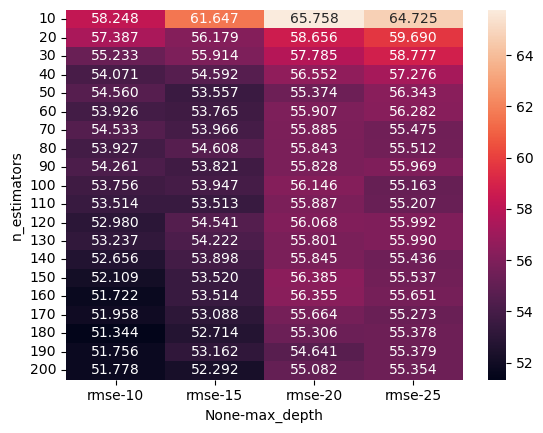

In [124]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [125]:
def min_rmse(list_dict, key):
    return min(list_dict, key=lambda x:x[key])

print(f"The best max_depth is: {min_rmse(LIST_RSME_SCORES, 'rmse')['max_depth']}")


The best max_depth is: 10


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* **`study_hours_per_week`** (answer)
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`

In [126]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
features_list = dv.get_feature_names_out()
features_list

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [128]:
rfr = RandomForestRegressor(
    max_depth=20,
    n_estimators=10,
    random_state=1,
)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, random_state=1)

In [129]:
array_importances = rfr.feature_importances_
matrix_importance = np.empty(
    (len(rfr.estimators_), array_importances.shape[0])
    )
for i, tree in enumerate(rfr.estimators_):
    matrix_importance[i,:] = tree.feature_importances_

In [130]:
features_importance_list = [ (fname, fvalue) for fname, fvalue in zip(features_list, array_importances.tolist())]
features_importance_list.sort(key=lambda x: x[1], reverse=True)

In [131]:
df_feature_importance = pd.DataFrame(features_importance_list, columns=['feature', 'importance'])
df_feature_importance

,feature,importance
0,study_hours_per_week,0.248354
1,attendance_rate,0.149729
2,distance_to_school,0.136486
3,teacher_quality,0.082682
4,age,0.069311
5,assignments_completed,0.031517
6,socioeconomic_status=High,0.025714
7,parent_involvement=High,0.022919
8,it_knowledge=High,0.017719
9,parent_education_level=Secondary,0.016957


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* **0.1** (answer)
* Both give equal value

In [132]:
xgb_params = {
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [133]:
ETHA_VALUES = [0.1, 0.3]

import xgboost as xgb

xgb.set_config(verbosity=0)

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [134]:
xgb_models = []
rmse_values = []

for e in ETHA_VALUES:
    xgb_params["eta"] = e
    model = xgb.train(
        xgb_params, 
        dtrain, 
        num_boost_round=100, 
        evals=watchlist, 
        early_stopping_rounds=10
        )
    rmse = model.eval(dval)
    xgb_models.append(model)
    rmse_values.append(rmse)

[0]	train-rmse:45.50072	eval-rmse:46.99373
[1]	train-rmse:44.12583	eval-rmse:45.89771
[2]	train-rmse:42.92815	eval-rmse:45.01746
[3]	train-rmse:41.90445	eval-rmse:44.27569
[4]	train-rmse:40.94238	eval-rmse:43.62411
[5]	train-rmse:40.15460	eval-rmse:43.05644
[6]	train-rmse:39.43451	eval-rmse:42.64605
[7]	train-rmse:38.77902	eval-rmse:42.28889
[8]	train-rmse:38.17103	eval-rmse:42.00035
[9]	train-rmse:37.60436	eval-rmse:41.73633
[10]	train-rmse:37.11353	eval-rmse:41.55631
[11]	train-rmse:36.65501	eval-rmse:41.33670
[12]	train-rmse:36.26337	eval-rmse:41.18307
[13]	train-rmse:35.84634	eval-rmse:41.03057
[14]	train-rmse:35.45796	eval-rmse:40.89024
[15]	train-rmse:35.07766	eval-rmse:40.70892
[16]	train-rmse:34.73181	eval-rmse:40.60601
[17]	train-rmse:34.40922	eval-rmse:40.47982
[18]	train-rmse:34.13466	eval-rmse:40.43780
[19]	train-rmse:33.88018	eval-rmse:40.38390
[20]	train-rmse:33.57997	eval-rmse:40.37859
[21]	train-rmse:33.33993	eval-rmse:40.33974
[22]	train-rmse:33.08144	eval-rmse:40.3170

In [135]:
for e,r in zip(ETHA_VALUES, rmse_values):
    print(f"eta: {e}, rmse: {r}")

eta: 0.1, rmse: [0]	eval-rmse:40.17015417640804742
eta: 0.3, rmse: [0]	eval-rmse:41.51113022325007762


## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw06
* If your answer doesn't match options exactly, select the closest one


__________________

Made with Love ❤️ by [@jelambrar96](https://github.com/jelambrar96)